## Gaussian Transformation with Scikit-learn -2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer, PowerTransformer

In [2]:
data = pd.read_excel('HousingPrices.xls')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


Let's select the **numerical and positive variables** in the dataset for this demonstration. As most of the transformations require the variables to be positive.

In [3]:
cols = []
for col in data.columns:
    if data[col].dtypes != 'O' and col != 'Id':  # if the variable is numerical
        if np.sum(np.where(data[col] <= 0, 1, 0)) == 0:  # if the variable is positive
            cols.append(col)  # append variable to the list
cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'MoSold',
 'YrSold',
 'SalePrice']

**Explore the distribution of the numerical variables!**

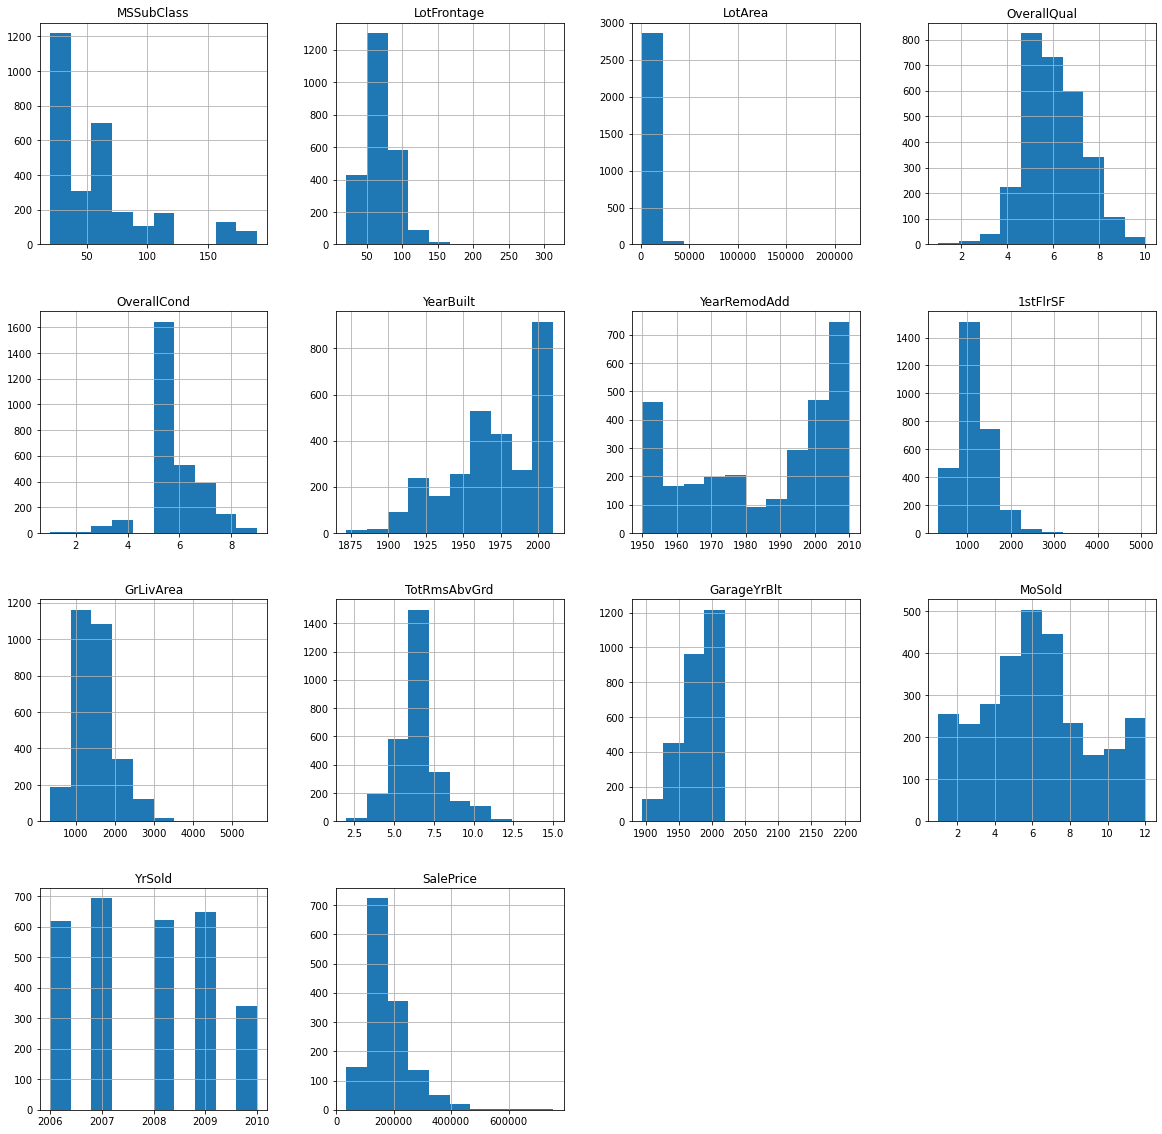

In [4]:
data[cols].hist(figsize=(20,20))
plt.show()

## Plots to assess normality

To visualise the distribution of the variables, we plot a **histogram and a Q-Q plot**. In the **Q-Q pLots**, if the variable is normally distributed, the values of the variable should **fall in a 45 degree line** when plotted against the theoretical quantiles.

**Plot the histograms to have a quick look at the variable distribution! Histogram and Q-Q plots!..**

In [5]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

### Logarithmic transformation

**Create a log transformer!**

In [6]:
transformer = FunctionTransformer(np.log, validate=True)

**Transform all the numerical and positive variables!**

In [7]:
data_t = transformer.transform(data[cols].fillna(1))

**Scikit-learn returns NumPy arrays, so capture in dataframe! Note that Scikit-learn will return an array with only the columns indicated in cols!**

In [8]:
data_t = pd.DataFrame(data_t, columns = cols)

**Original distribution!**

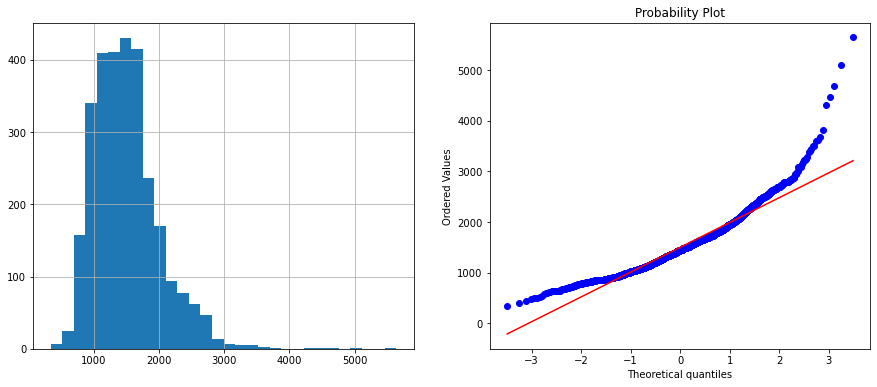

In [9]:
diagnostic_plots(data, 'GrLivArea')

**Transformed distribution!**

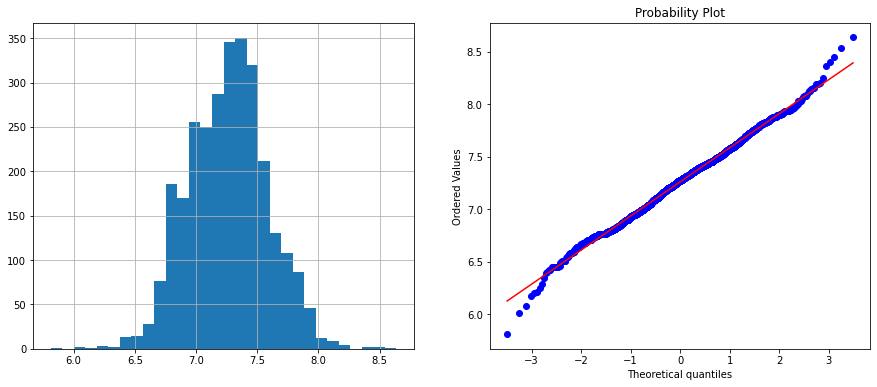

In [10]:
diagnostic_plots(data_t, 'GrLivArea')

**Original distribution!**

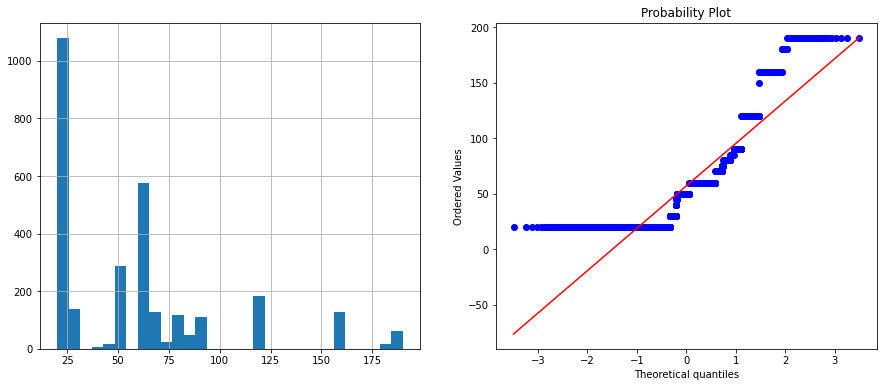

In [11]:
diagnostic_plots(data, 'MSSubClass')

**Transformed distribution!**

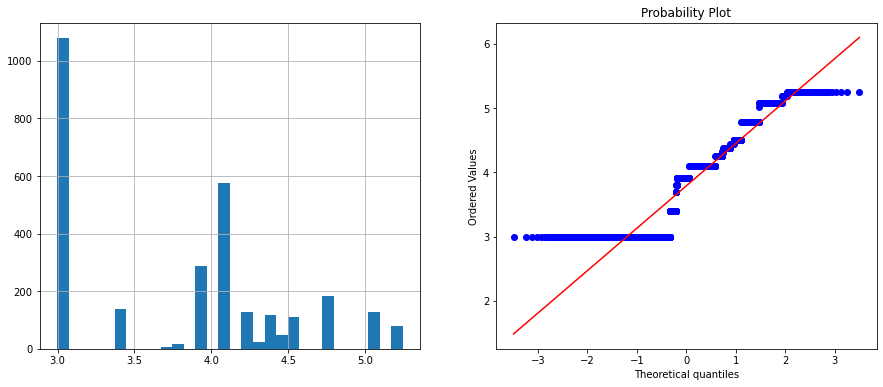

In [12]:
diagnostic_plots(data_t, 'MSSubClass')

### Reciprocal transformation

**Create the transformer! Transform the positive variables! Then re-capture in a dataframe!**

transformer = FunctionTransformer(np.reciprocal, validate=True)

In [13]:
transformer = FunctionTransformer(lambda x: 1/x, validate=True)
data_t = transformer.transform(data[cols].fillna(1))
data_t = pd.DataFrame(data_t, columns = cols)

**Transformed variable!**

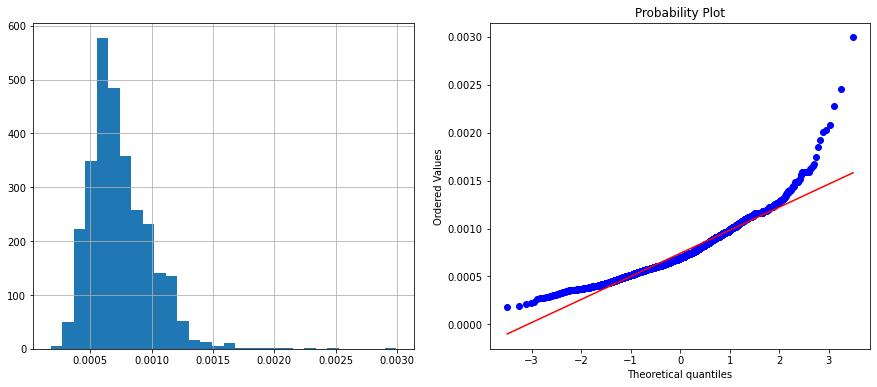

In [14]:
diagnostic_plots(data_t, 'GrLivArea')

**Transformed variable!**

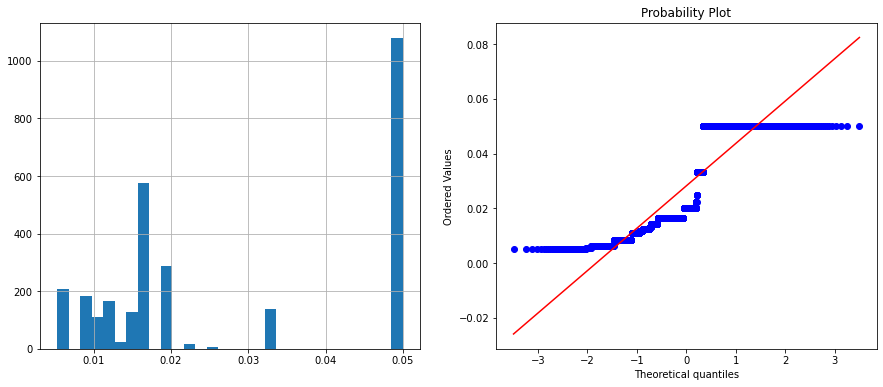

In [15]:
diagnostic_plots(data_t, 'MSSubClass')

### Square root transformation

transformer = FunctionTransformer(np.sqrt, validate=True)

In [16]:
transformer = FunctionTransformer(lambda x: x**(1/2), validate=True)
data_t = transformer.transform(data[cols].fillna(1))
data_t = pd.DataFrame(data_t, columns = cols)

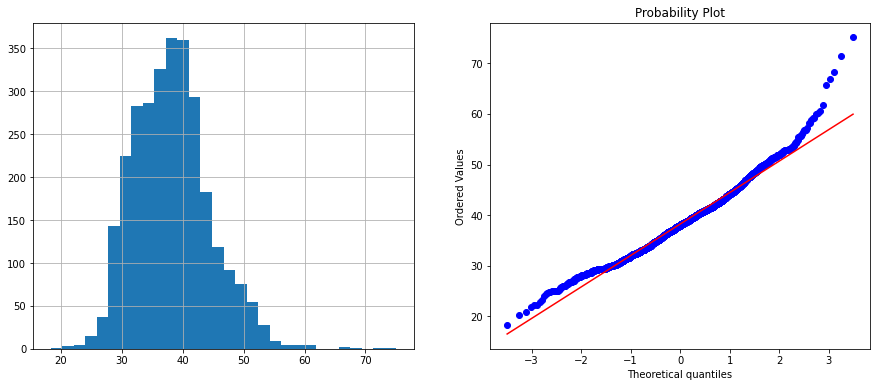

In [17]:
diagnostic_plots(data_t, 'GrLivArea')

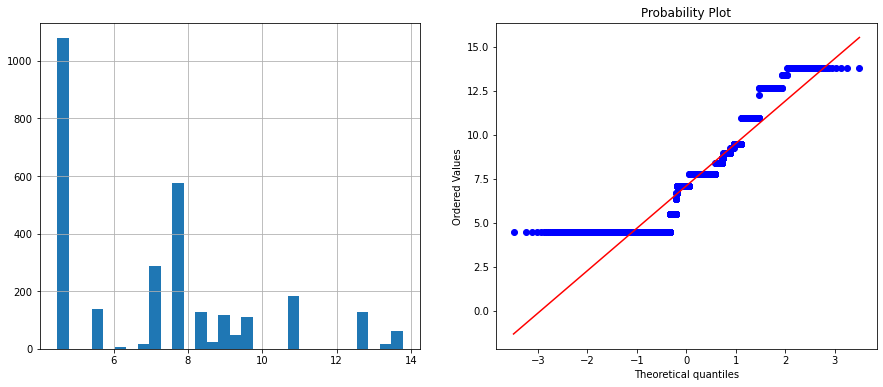

In [18]:
diagnostic_plots(data_t, 'MSSubClass')

### Exponential

In [19]:
transformer = FunctionTransformer(lambda x: x**(1/1.2), validate=True)
data_t = transformer.transform(data[cols].fillna(1))
data_t = pd.DataFrame(data_t, columns = cols)

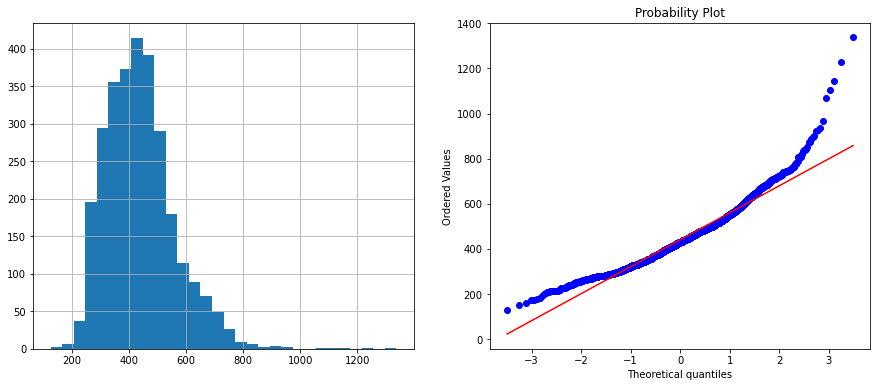

In [20]:
diagnostic_plots(data_t, 'GrLivArea')

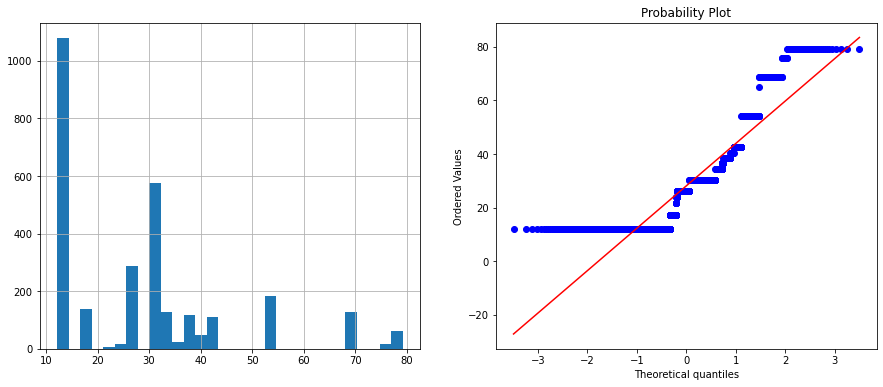

In [21]:
diagnostic_plots(data_t, 'MSSubClass')

### Box-Cox transformation

**Create the transformer! Find the optimal lambda using the train set! Transform the data! Then capture data in a dataframe!**

In [22]:
transformer = PowerTransformer(method='box-cox', standardize=False)
transformer.fit(data[cols].fillna(1))
data_t = transformer.transform(data[cols].fillna(1))
data_t = pd.DataFrame(data_t, columns = cols)

2022-02-02 04:40:56,358 [26456] WARNING  py.warnings:109: [JupyterRequire] C:\Users\husey\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)

2022-02-02 04:40:56,374 [26456] WARNING  py.warnings:109: [JupyterRequire] C:\Users\husey\anaconda3\lib\site-packages\scipy\stats\morestats.py:914: RuntimeWarning: divide by zero encountered in log
  return (lmb - 1) * np.sum(logdata, axis=0) - N/2 * np.log(variance)



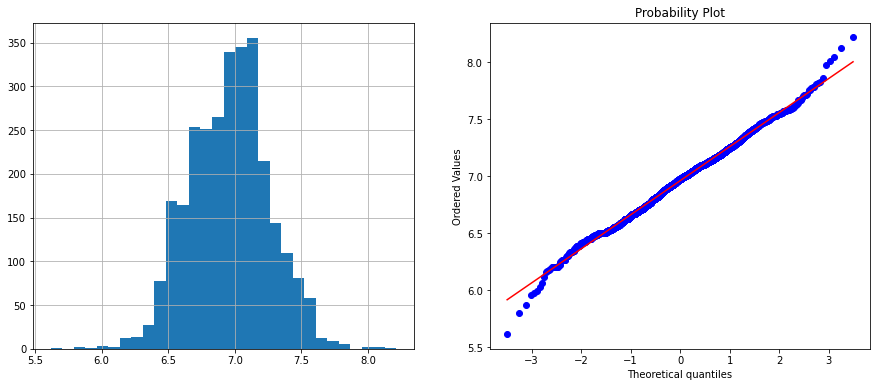

In [23]:
diagnostic_plots(data_t, 'GrLivArea')

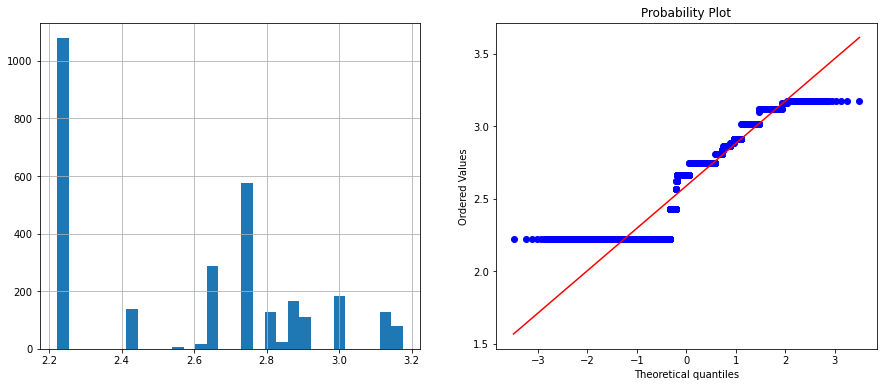

In [24]:
diagnostic_plots(data_t, 'MSSubClass')

### Yeo-Johnson

Yeo-Johnson is an adaptation of Box-Cox that can also be used in negative value variables. So let's expand the list of variables for the demo, to include those that contain zero and negative values as well. 

In [25]:
cols = [
    'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
    'OverallCond', 'MasVnrArea', 'BsmtFinSF1',
    'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
    'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
    'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
    'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
    'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
    'MiscVal', 'SalePrice']

**Call the transformer! Learn the lambda from the train set! Transform the data! Capture data in a dataframe!**

In [26]:
transformer = PowerTransformer(method='yeo-johnson', standardize=False)
transformer.fit(data[cols].fillna(1))
data_t = transformer.transform(data[cols].fillna(1))
data_t = pd.DataFrame(data_t, columns = cols)

2022-02-02 04:41:06,039 [26456] WARNING  py.warnings:109: [JupyterRequire] C:\Users\husey\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())



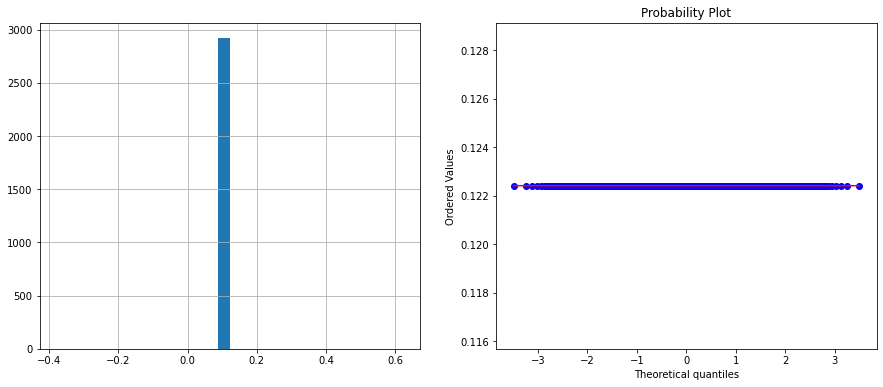

In [27]:
diagnostic_plots(data_t, 'GrLivArea')

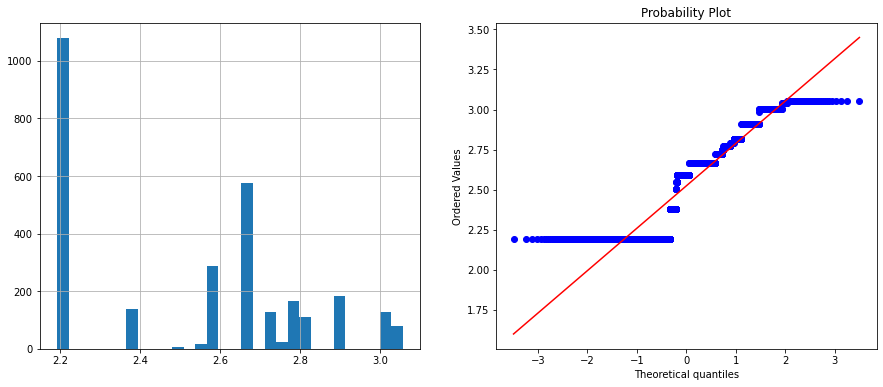

In [28]:
diagnostic_plots(data_t, 'MSSubClass')